# Cyber Attack Prediction on SDN Based IDS Dataset with Machine Learning

## Loading and Exploring Dataset

In [12]:
# Importing main packages in the beginning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
%%time

df = pd.read_csv('../Project/Dataset/SDN_Intrusion.csv')

CPU times: total: 12.9 s
Wall time: 14.6 s


In [14]:
df.head(10)

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,80,9865922,5,0,30,0,6,6,6.00,...,20,1986.00,0.00,1986,1986,9863936.00,0.00,9863936,9863936,DDoS
1,1,443,158423,24,22,703,24564,453,0,29.29,...,32,0.00,0.00,0,0,0.00,0.00,0,0,BENIGN
2,2,443,61163904,14,12,993,3445,620,0,70.93,...,20,147216.67,152989.51,459505,84515,10000000.00,21747.05,10100000,9999779,BENIGN
3,3,443,110544045,18,18,1213,4216,812,0,67.39,...,20,75305.73,133115.50,476664,35046,9970949.91,80601.92,10000000,9728297,BENIGN
4,4,53,185,2,2,104,136,52,52,52.00,...,20,0.00,0.00,0,0,0.00,0.00,0,0,BENIGN
5,5,53,672,1,1,79,161,79,79,79.00,...,32,0.00,0.00,0,0,0.00,0.00,0,0,BENIGN
6,6,51323,490655,6,2,11607,26,5840,0,1934.50,...,20,0.00,0.00,0,0,0.00,0.00,0,0,BENIGN
7,7,53,163154,2,2,70,168,35,35,35.00,...,32,0.00,0.00,0,0,0.00,0.00,0,0,BENIGN
8,8,80,1875517,3,6,26,11601,20,0,8.67,...,20,0.00,0.00,0,0,0.00,0.00,0,0,DDoS
9,9,53,23800,2,2,64,96,32,32,32.00,...,40,0.00,0.00,0,0,0.00,0.00,0,0,BENIGN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188333 entries, 0 to 1188332
Data columns (total 80 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1188333 non-null  int64  
 1    Destination Port             1188333 non-null  int64  
 2    Flow Duration                1188333 non-null  int64  
 3    Total Fwd Packets            1188333 non-null  int64  
 4    Total Backward Packets       1188333 non-null  int64  
 5   Total Length of Fwd Packets   1188333 non-null  int64  
 6    Total Length of Bwd Packets  1188333 non-null  int64  
 7    Fwd Packet Length Max        1188333 non-null  int64  
 8    Fwd Packet Length Min        1188333 non-null  int64  
 9    Fwd Packet Length Mean       1188333 non-null  float64
 10   Fwd Packet Length Std        1188333 non-null  float64
 11  Bwd Packet Length Max         1188333 non-null  int64  
 12   Bwd Packet Length Min      

In [16]:
print("Total number  of samples:", df.shape[0], "\n")

# Sample distribution by class -> An unknown symbol was found in label names
df.groupby(['Class']).size()

Total number  of samples: 1188333 



Class
BENIGN                        798322
DDoS                          383439
Web Attack � Brute Force        4550
Web Attack � Sql Injection        60
Web Attack � XSS                1962
dtype: int64

<AxesSubplot:>

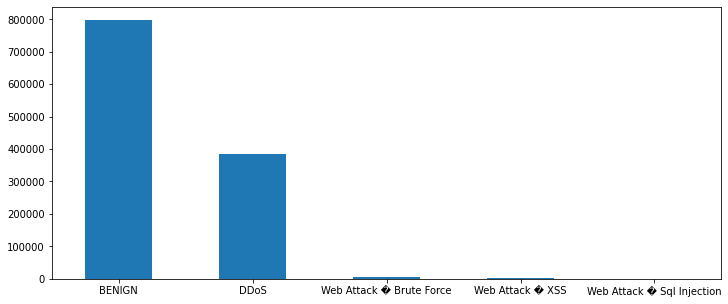

In [17]:
# Bar graph for sample distribution by class

df['Class'].value_counts().plot(kind='bar', figsize=(12,5), rot=0)

## Preprocessing

### Data Cleansing

In [18]:
# Extra spaces were found in column names. So, they were striped
df = df.rename(columns = lambda x: x.strip())

# Renaming the index and target column
df.rename(columns={'Class': 'Attack_Type', 'Unnamed: 0': 'ID'}, inplace=True)

# Selecting ID column as index for dataframe
df = df.set_index('ID')

In [19]:
# Checking null counts -> 71 samples in column 'Flow Bytes/s' have null value
for column, count in df.isna().sum().items():
    if count != 0:
        print(column, count)
        
# Viewing the column that has null values -> They are all from BENIGN class
df[df['Flow Bytes/s'].isna()][['Flow Bytes/s','Attack_Type']]
df[df['Flow Bytes/s'].isna()]['Attack_Type'].value_counts()

# We freely remove 71 samples because of having so many samples already
df.dropna(inplace=True)

Flow Bytes/s 71


,Flow Bytes/s,Attack_Type
ID,,
21334,NaN,BENIGN
26659,NaN,BENIGN
43797,NaN,BENIGN
71788,NaN,BENIGN
114252,NaN,BENIGN
...,...,...
1133080,NaN,BENIGN
1133658,NaN,BENIGN
1168148,NaN,BENIGN


BENIGN    71
Name: Attack_Type, dtype: int64

In [20]:
# Renaming label names
df['Attack_Type'] = df['Attack_Type'].str.replace('Web Attack � Brute Force', 'Web - Brute Force')
df['Attack_Type'] = df['Attack_Type'].str.replace('Web Attack � Sql Injection', 'Web - SQL Injection')
df['Attack_Type'] = df['Attack_Type'].str.replace('Web Attack � XSS', 'Web - XSS')

df.groupby(['Attack_Type']).size()

Attack_Type
BENIGN                 798251
DDoS                   383439
Web - Brute Force        4550
Web - SQL Injection        60
Web - XSS                1962
dtype: int64

In [21]:
# Due to some too large values (infinite numbers), samples with these values were removed
# They were from 'BENIGN' and 'DDoS' classes, which means it is totally fine to remove them thanks to having so many samples

initial_sample_number = df.shape[0]

df = df[~df.isin([np.inf, -np.inf]).any(1)]

print(f"\n{initial_sample_number-df.shape[0]} samples were removed")


480 samples were removed


In [22]:
# Descriptive statistics of features
descriptive_stats = df.describe().transpose()

descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Destination Port,1187782.00,8471.34,19142.70,0.00,53.00,80.00,443.00,65532.00
Flow Duration,1187782.00,14628582.81,31765900.46,-1.00,17026.00,280711.00,6105856.00,119999993.00
Total Fwd Packets,1187782.00,9.60,745.00,1.00,2.00,3.00,5.00,200755.00
Total Backward Packets,1187782.00,10.79,989.84,0.00,1.00,2.00,5.00,270686.00
Total Length of Fwd Packets,1187782.00,784.66,5759.46,0.00,26.00,48.00,90.00,1197199.00
...,...,...,...,...,...,...,...,...
Active Min,1187782.00,122730.39,678863.96,0.00,0.00,0.00,878.00,103000000.00
Idle Mean,1187782.00,7473818.73,18860486.01,0.00,0.00,0.00,5928889.00,120000000.00
Idle Std,1187782.00,2119696.71,9861617.35,0.00,0.00,0.00,0.00,72600000.00
Idle Max,1187782.00,8974380.51,22570390.16,0.00,0.00,0.00,5932024.00,120000000.00


In [23]:
# Dropping columns that have 0 value for all samples, i.e. 0 mean and 0 std

print("Shape before:", df.shape)

descriptive_stats[(descriptive_stats['mean'] == 0) & (descriptive_stats['std'] == 0)]

cols_to_drop = descriptive_stats[descriptive_stats['mean'] == 0].index
df.drop(cols_to_drop, axis = 1, inplace=True)

# Shape after -> 10 features were dropped
print("\nShape after:", df.shape)

Shape before: (1187782, 79)


,count,mean,std,min,25%,50%,75%,max
Bwd PSH Flags,1187782.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fwd URG Flags,1187782.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bwd URG Flags,1187782.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CWE Flag Count,1187782.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fwd Avg Bytes/Bulk,1187782.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fwd Avg Packets/Bulk,1187782.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fwd Avg Bulk Rate,1187782.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bwd Avg Bytes/Bulk,1187782.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bwd Avg Packets/Bulk,1187782.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bwd Avg Bulk Rate,1187782.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



Shape after: (1187782, 69)


### Outlier Analysis

In [24]:
from scipy import stats

print("Sample distribution by class before:\n")
df.groupby(['Attack_Type']).size()

df2 = df.copy()

initial_sample_number = df2.shape[0]
print("\nTotal number of samples before:", initial_sample_number)
columns = df2.columns.difference(['Attack_Type'])

for column in columns:
    df2['Z_score'] = stats.zscore(df2[column])
    df2.drop(df2.loc[df2['Z_score'].abs() > 3].index, inplace=True)

print(f"\n{initial_sample_number-df2.shape[0]} samples would be removed")

Sample distribution by class before:



Attack_Type
BENIGN                 797780
DDoS                   383430
Web - Brute Force        4550
Web - SQL Injection        60
Web - XSS                1962
dtype: int64


Total number of samples before: 1187782

709366 samples would be removed


In [25]:
df2.groupby(['Attack_Type']).size()
del df2

Attack_Type
BENIGN       334454
DDoS         143919
Web - XSS        43
dtype: int64

- **709366** samples were being removed after outlier analysis using Z-score
- As it can be seen from the cell above, we lose all the samples of two classes
- Not to lose the samples of the minority classes, outlier removal was apllied to only majority classes. Also, we should not train a model with highly unbalanced dataset, we will eventually crop the majority classes to a more balanced size. So, it was decided to remove the outliers of only majority classes.

In [26]:
initial_sample_number = df.shape[0]
columns = df.columns.difference(['Attack_Type'])

for column in columns:
    df['Z_score'] = stats.zscore(df[column])
    df.drop(df.loc[(df['Z_score'].abs() > 3) & (df['Attack_Type'].isin(['BENIGN','DDoS']))].index, inplace=True)
    
print("Current sample distribution by class:\n")
df.groupby(['Attack_Type']).size()

print(f"\n{initial_sample_number-df.shape[0]} samples were removed")

# Removing Z_Score column from the dataset

df.drop(['Z_score'], axis=1, inplace=True)

Current sample distribution by class:



Attack_Type
BENIGN                 349188
DDoS                   180367
Web - Brute Force        4550
Web - SQL Injection        60
Web - XSS                1962
dtype: int64


651655 samples were removed


### Correlation Analysis

In [74]:
# 0.95 was the threshold, greater than this was treated as highly correlated

# Pearson correleation method was chosen, it is deafult parameter
correlations = df.corr().abs()

# Only upper part of correlation matrix was used since the matrix is symmetric
upper_matrix = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))

features_to_drop = []

# The loop below shows us each feature's highly correlated features individually
for column in upper_matrix.columns:
    if any(upper_matrix[column] > 0.95):
        features_to_drop.append(column)
        pd.DataFrame(upper_matrix[column][upper_matrix[column] > 0.95])
        
print(f"There are {len(features_to_drop)} features which are highly correlated")

,Total Length of Fwd Packets
Total Fwd Packets,0.97


,Bwd Packet Length Mean
Bwd Packet Length Max,0.98


,Bwd Packet Length Std
Bwd Packet Length Max,0.99
Bwd Packet Length Mean,0.98


,Flow IAT Std
Flow IAT Mean,0.99


,Flow IAT Max
Flow IAT Mean,0.95
Flow IAT Std,0.98


,Fwd IAT Mean
Flow IAT Mean,0.95


,Fwd IAT Std
Flow IAT Mean,0.97
Fwd IAT Mean,0.99


,Fwd IAT Max
Flow IAT Mean,0.95
Fwd IAT Std,0.99


,Bwd IAT Std
Bwd IAT Mean,0.96


,Bwd IAT Max
Bwd IAT Std,0.99


,Fwd Header Length
Total Fwd Packets,0.99
Total Length of Fwd Packets,0.99


,Bwd Header Length
Total Backward Packets,0.98


,Min Packet Length
Fwd Packet Length Min,1.00


,Max Packet Length
Bwd Packet Length Max,1.00
Bwd Packet Length Mean,0.98
Bwd Packet Length Std,0.99


,Packet Length Mean
Bwd Packet Length Max,0.98
Bwd Packet Length Mean,1.00
Bwd Packet Length Std,0.97
Max Packet Length,0.98


,Packet Length Std
Bwd Packet Length Max,0.99
Bwd Packet Length Mean,0.99
Bwd Packet Length Std,1.00
Max Packet Length,0.99
Packet Length Mean,0.99


,Packet Length Variance
Bwd Packet Length Max,0.98
Bwd Packet Length Mean,0.96
Bwd Packet Length Std,0.99
Max Packet Length,0.98
Packet Length Std,0.98


,PSH Flag Count
Bwd Packet Length Mean,0.95
Packet Length Mean,0.96


,Average Packet Size
Bwd Packet Length Max,0.98
Bwd Packet Length Mean,1.00
Bwd Packet Length Std,0.97
Max Packet Length,0.98
Packet Length Mean,1.00
Packet Length Std,0.99
PSH Flag Count,0.96


,Avg Fwd Segment Size
Fwd Packet Length Mean,1.00


,Avg Bwd Segment Size
Bwd Packet Length Max,0.98
Bwd Packet Length Mean,1.00
Bwd Packet Length Std,0.98
Max Packet Length,0.98
Packet Length Mean,1.00
Packet Length Std,0.99
Packet Length Variance,0.96
PSH Flag Count,0.95
Average Packet Size,1.00


,Fwd Header Length.1
Total Fwd Packets,0.99
Total Length of Fwd Packets,0.99
Fwd Header Length,1.00


,Subflow Fwd Packets
Total Fwd Packets,1.00
Total Length of Fwd Packets,0.97
Fwd Header Length,0.99
Fwd Header Length.1,0.99


,Subflow Fwd Bytes
Total Fwd Packets,0.97
Total Length of Fwd Packets,1.00
Fwd Header Length,0.99
Fwd Header Length.1,0.99
Subflow Fwd Packets,0.97


,Subflow Bwd Packets
Total Backward Packets,1.00
Bwd Header Length,0.98


,Subflow Bwd Bytes
Total Length of Bwd Packets,1.00


,act_data_pkt_fwd
Total Fwd Packets,0.97
Subflow Fwd Packets,0.97


There are 27 features which are highly correlated


<AxesSubplot:>

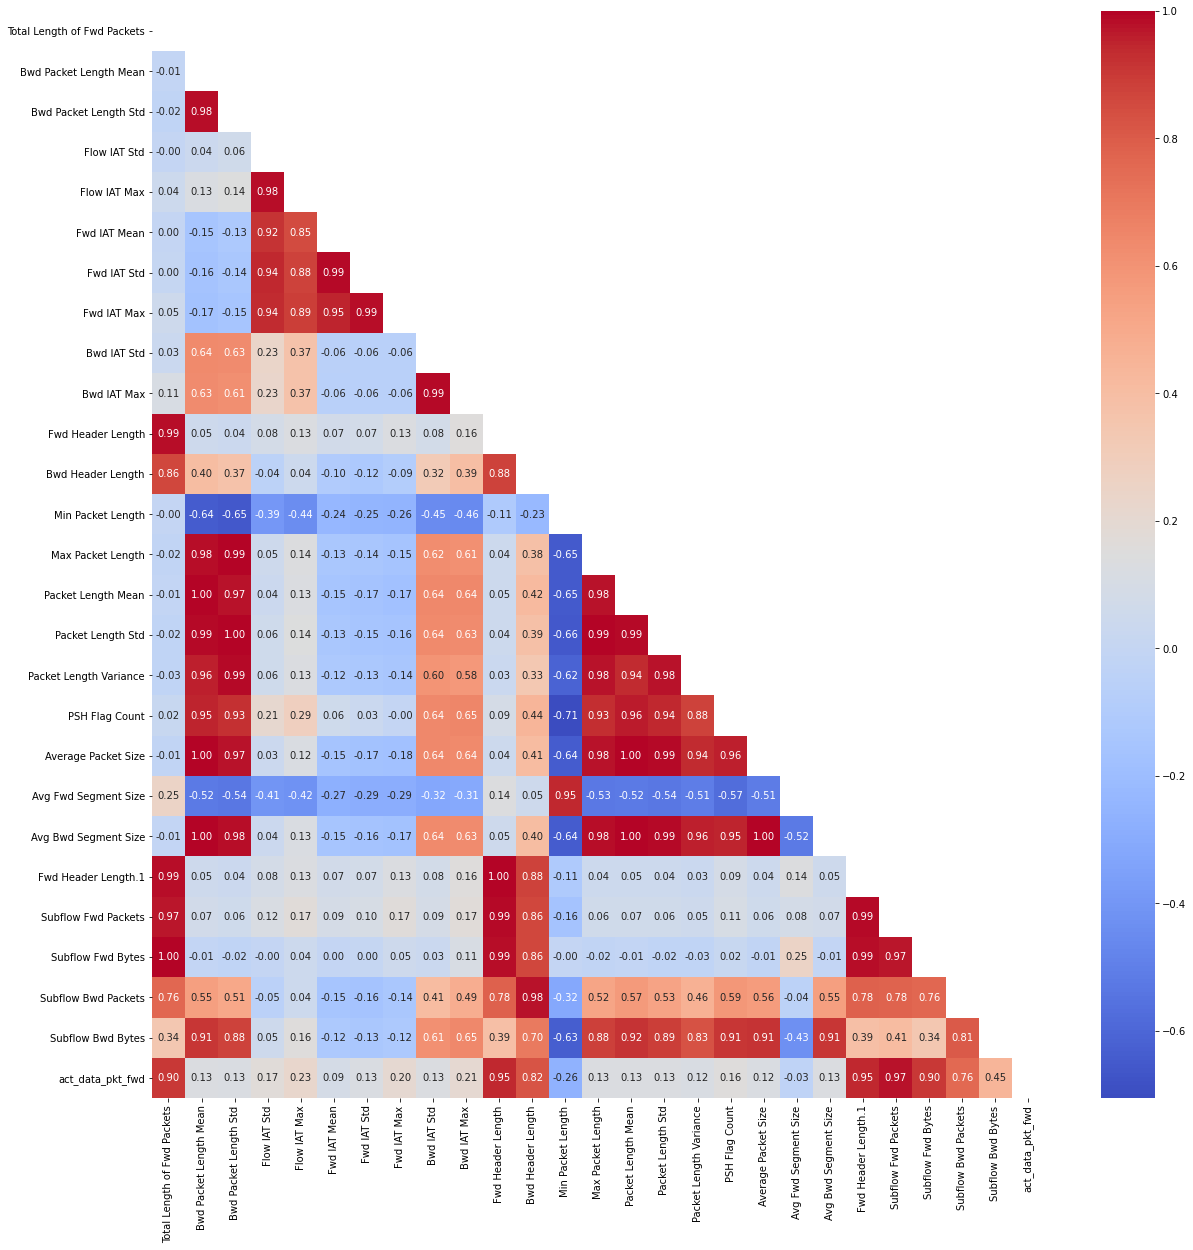

In [95]:
# Heatmap to show the highly correlated features

# The graph shows that in each line of the map, we have at least one relevant color cell that shows high correlation
correlations = df[features_to_drop].corr()
mask = np.triu(np.ones_like(correlations, dtype=np.bool))

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, ax=ax, annot=True, mask=mask, cmap='coolwarm', fmt='.2f')
plt.show()

In [18]:
# Dropping highly correlated features 

print("Shape before:", df.shape)

df.drop(features_to_drop, axis=1, inplace=True)

# Shape after -> 27 features were dropped
print("\nShape after:", df.shape)

Shape before: (536127, 69)

Shape after: (536127, 42)


### Preparation for Training

In [20]:
# Removing some random samples from BENIGN class to reduce computational time -> Equaling to sample number of DDoS class

# Before
df.groupby(['Attack_Type']).size()

sample_size = df[df['Attack_Type'] == 'BENIGN'].shape[0] - df[df['Attack_Type'] == 'DDoS'].shape[0]

df = df.drop(df[df['Attack_Type'] == 'BENIGN'].sample(n=sample_size, random_state=42).index)

# After
df.groupby(['Attack_Type']).size()

Attack_Type
BENIGN                 180367
DDoS                   180367
Web - Brute Force        4550
Web - SQL Injection        60
Web - XSS                1962
dtype: int64

Attack_Type
BENIGN                 180367
DDoS                   180367
Web - Brute Force        4550
Web - SQL Injection        60
Web - XSS                1962
dtype: int64

In [21]:
## Splitting features and target from dataset
X = df.drop('Attack_Type', axis=1)
y = pd.DataFrame(df['Attack_Type'])

X.shape
y.shape

(367306, 41)

(367306, 1)

In [22]:
# Scaling dataset using Robust Scaler which is good technique to scale when there are outliers
# It basically uses the inter quartile range (IQR) when scaling and removes median (official doc.)

from sklearn import preprocessing

r_scaler = preprocessing.RobustScaler()
X_scaled = r_scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

# Final dataset for the algorithms
X_scaled.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
ID,,,,,,,,,,,,,,,,,,,,,
5,-1.0,-0.077354,-2.0,-0.25,-0.004258,3.105263,1.921053,2.397727,0.0,0.006396,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,2.204629,0.0,1.00,0.989833,0.000000,-0.157895,0.000000,1.0,0.735696,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-1.0,-0.049204,-1.0,0.00,-0.009906,0.631579,0.684211,0.795455,0.0,-0.013137,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,-0.004522,0.0,1.00,0.989833,0.000000,-0.157895,0.000000,1.0,0.988073,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,-1.0,-0.077890,-1.0,0.00,-0.000521,1.157895,0.947368,1.136364,0.0,-0.003803,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Label encoding for class labels

label_encoder = preprocessing.LabelEncoder()
y_label_encoded = label_encoder.fit_transform(y['Attack_Type'])
y_label_encoded = pd.DataFrame(y_label_encoded, index=y.index, columns=y.columns)

class_mappings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
class_mappings

{'BENIGN': 0,
 'DDoS': 1,
 'Web - Brute Force': 2,
 'Web - SQL Injection': 3,
 'Web - XSS': 4}

In [24]:
# Saving the preprocessed dataset

X_scaled.to_pickle("../Project/Dataset/X_scaled.pkl")
y_label_encoded.to_pickle("../Project/Dataset/y_label_encoded.pkl")

with open('./Dataset/class_mappings.txt','w') as data: 
    data.write(str(class_mappings))
    
# The number 90 in output can be ignored, it is the output of write function

90

## Training Models Without Sampling

### Initial Training

In [1]:
# Importing some packages which will be used in training and evaluation

import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

In [2]:
# Reading the preprocessed dataset and class mappings

import ast

X_scaled = pd.read_pickle("../Project/Dataset/X_scaled.pkl")
y_label_encoded = pd.read_pickle("../Project/Dataset/y_label_encoded.pkl")

with open('./Dataset/class_mappings.txt') as f:
    string_data = f.read()
class_mappings = ast.literal_eval(string_data)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_label_encoded, test_size=0.2, random_state=420)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(293844, 41)

(73462, 41)

(293844, 1)

(73462, 1)

In [4]:
# Writing a function to evaluate trained model

def evaluate(y_pred, y_test):
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    print("\n\n", classification_report(y_test, y_pred))

In [5]:
# # Training many algorithms at once with non-sampled data to find out which one performs best

# lc = LazyClassifier(predictions=True)
# models, predictions = lc.fit(X_train, X_test, y_train, y_test)
# models

### Decision Tree

In [6]:
# Training Decision Tree with default parameters

from sklearn.tree import DecisionTreeClassifier

dt_default = DecisionTreeClassifier(random_state=0)
dt_default.fit(X_train, y_train)
y_pred = dt_default.predict(X_test)

evaluate(y_pred, y_test)

DecisionTreeClassifier(random_state=0)

[[36000     3     0     0     0]
 [    0 36189     0     0     0]
 [    0     0   839     0    19]
 [    0     0     0    14     0]
 [    0     0    28     0   370]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36003
           1       1.00      1.00      1.00     36189
           2       0.97      0.98      0.97       858
           3       1.00      1.00      1.00        14
           4       0.95      0.93      0.94       398

    accuracy                           1.00     73462
   macro avg       0.98      0.98      0.98     73462
weighted avg       1.00      1.00      1.00     73462



In [7]:
# Grid search for Decision Tree

# params = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': [None, 3, 5, 7],
#     'min_samples_split': [2, 3, 4, 5]
# }

# grid_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=5)
# grid_cv.fit(X_train, y_train)

# grid_cv.best_params_

In [8]:
# Training Decision Tree with best parameter combination and evaluating

dt_optimised = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=None, min_samples_split=2)
dt_optimised.fit(X_train, y_train)
y_pred = dt_optimised.predict(X_test)

evaluate(y_pred, y_test)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[[36000     3     0     0     0]
 [    0 36189     0     0     0]
 [    0     0   838     0    20]
 [    0     0     0    14     0]
 [    0     0    25     0   373]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36003
           1       1.00      1.00      1.00     36189
           2       0.97      0.98      0.97       858
           3       1.00      1.00      1.00        14
           4       0.95      0.94      0.94       398

    accuracy                           1.00     73462
   macro avg       0.98      0.98      0.98     73462
weighted avg       1.00      1.00      1.00     73462



### Random Forest

In [9]:
# Training Random Forest with default parameters

from sklearn.ensemble import RandomForestClassifier

rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred = rf_default.predict(X_test)

evaluate(y_pred, y_test)

RandomForestClassifier(random_state=0)

[[36002     1     0     0     0]
 [    0 36189     0     0     0]
 [    0     0   847     0    11]
 [    0     0     0    14     0]
 [    0     0    21     0   377]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36003
           1       1.00      1.00      1.00     36189
           2       0.98      0.99      0.98       858
           3       1.00      1.00      1.00        14
           4       0.97      0.95      0.96       398

    accuracy                           1.00     73462
   macro avg       0.99      0.99      0.99     73462
weighted avg       1.00      1.00      1.00     73462



In [10]:
# Grid search for Random Forest

# params = { 
#     'n_estimators': [50, 100, 150],
#     'max_depth' : [3, 5, 7, None],
#     'criterion': ['gini', 'entropy', 'log_loss']
# }

# grid_cv = GridSearchCV(RandomForestClassifier(), params, verbose=1, cv=5)
# grid_cv.fit(X_train, y_train)

# grid_cv.best_params_

In [11]:
# Training Random Forest with best parameter combination and evaluating

rf_optimised = RandomForestClassifier(random_state=0, n_estimators=50, max_depth=None, criterion='entropy')
rf_optimised.fit(X_train, y_train)
y_pred = rf_optimised.predict(X_test)

evaluate(y_pred, y_test)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

[[36002     1     0     0     0]
 [    0 36189     0     0     0]
 [    0     0   848     0    10]
 [    0     0     0    14     0]
 [    1     0    21     0   376]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36003
           1       1.00      1.00      1.00     36189
           2       0.98      0.99      0.98       858
           3       1.00      1.00      1.00        14
           4       0.97      0.94      0.96       398

    accuracy                           1.00     73462
   macro avg       0.99      0.99      0.99     73462
weighted avg       1.00      1.00      1.00     73462



### Statistical Evaluation

In [53]:
# T-Test for Decision Tree default and optimised models

score_default = dt_default.fit(X_train, y_train).score(X_test, y_test)
score_optimised = dt_optimised.fit(X_train, y_train).score(X_test, y_test)

print('Decision Tree accuracy with default parameters: %.2f%%' % (score_default*100))
print('Decision Tree accuracy with optimised parameters: %.2f%%' % (score_optimised*100))

from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=dt_default, estimator2=dt_optimised, X=X_train, y=y_train)
alpha = 0.05

# print("\nT statistic: %.3f" % t)
print("\nAlpha value: ", alpha)
print("P value: %.3f" % p)

if p > alpha:
  print("\nFail to reject null hypotesis")
else:
  print("\nReject null hypotesis")

Decision Tree accuracy with default parameters: 99.93%
Decision Tree accuracy with optimised parameters: 99.93%

Alpha value:  0.05
P value: 0.722

Fail to reject null hypotesis


- We fail to reject null hypothesis, which means there is no significance difference between the models' performance (accuracy)

In [54]:
# T-Test for Random Forest default and optimised models

score_default = rf_default.fit(X_train, y_train).score(X_test, y_test)
score_optimised = rf_optimised.fit(X_train, y_train).score(X_test, y_test)

print('Random Forest accuracy with default parameters: %.2f%%' % (score_default*100))
print('Random Forest accuracy with optimised parameters: %.2f%%' % (score_optimised*100))

from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=rf_default, estimator2=rf_optimised, X=X_train, y=y_train)
alpha = 0.05

# print("\nT statistic: %.3f" % t)
print("\nAlpha value: ", alpha)
print("P value: %.3f" % p)

if p > alpha:
  print("\nFail to reject null hypotesis")
else:
  print("\nReject null hypotesis")

Random Forest accuracy with default parameters: 99.96%
Random Forest accuracy with optimised parameters: 99.96%

Alpha value:  0.05
P value: 0.395

Fail to reject null hypotesis


- We fail to reject null hypothesis, which means there is no significance difference between the models' performance (accuracy)

## Training Models With Sampling

### Sampling

<AxesSubplot:>

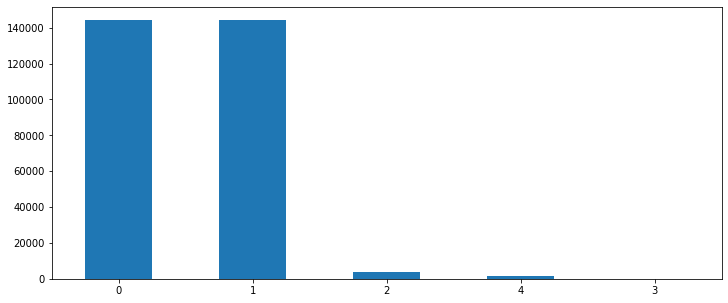

In [94]:
# Sample distribution by class before sampling

y_train['Attack_Type'].value_counts().plot(kind='bar', figsize=(12,5), rot=0)

In [95]:
COUNT_CLASS_0 = 10000
COUNT_CLASS_1 = 10000
COUNT_CLASS_2 = 5000
COUNT_CLASS_3 = 100
COUNT_CLASS_4 = 2000

# Under sampling the majority classes

from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(sampling_strategy={0: COUNT_CLASS_0, 1: COUNT_CLASS_1}, random_state=420)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Over sampling the minority classes

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy={2: COUNT_CLASS_2, 3: COUNT_CLASS_3, 4:COUNT_CLASS_4}, random_state=420)
X_sm, y_sm = sm.fit_resample(X_rus, y_rus)

X_train_sampled = X_sm
y_train_sampled = y_sm

<AxesSubplot:>

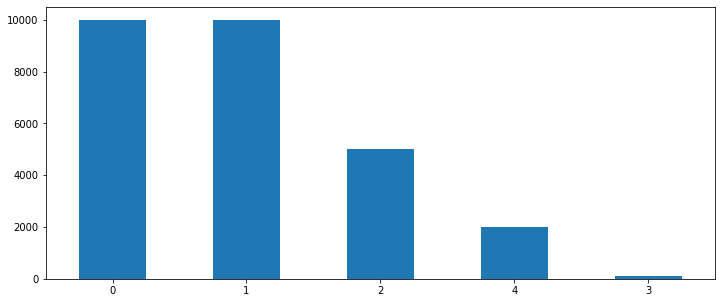

In [96]:
# Sample distribution by class after sampling

y_train_sampled['Attack_Type'].value_counts().plot(kind='bar', figsize=(12,5), rot=0)

<Figure size 1728x1008 with 0 Axes>

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

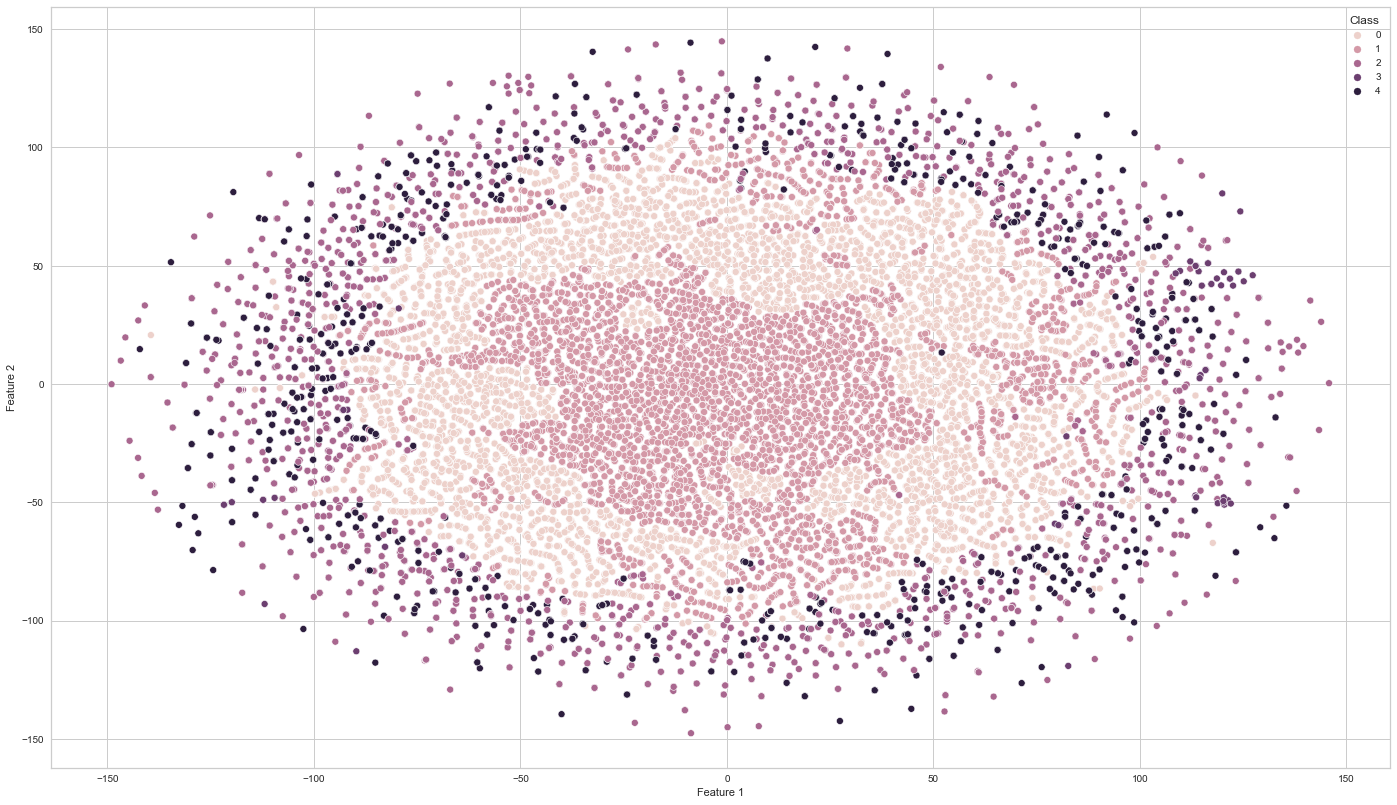

In [191]:
# T-SNE for visualization of sampled data

from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, init='random', learning_rate='auto', perplexity=3)
tsne_results = tsne.fit_transform(X_train_sampled) 

tsne_df = pd.DataFrame()
tsne_df['Feature 1'] = tsne_results[:,0]
tsne_df['Feature 2'] = tsne_results[:,1]
tsne_df['Class'] = y_train_sampled

plt.figure(figsize=(24,14))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Class', data=tsne_df)
plt.show()

### Decision Tree

In [97]:
# Training Decision Tree with default parameters

dt_deafult_sampled = DecisionTreeClassifier(random_state=0)
dt_deafult_sampled.fit(X_train_sampled, y_train_sampled)
y_pred = dt_deafult_sampled.predict(X_test)

evaluate(y_pred, y_test)

DecisionTreeClassifier(random_state=0)

[[35986     6     2     8     1]
 [    7 36182     0     0     0]
 [    0     0   835     0    23]
 [    0     0     0    14     0]
 [    0     0    29     0   369]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36003
           1       1.00      1.00      1.00     36189
           2       0.96      0.97      0.97       858
           3       0.64      1.00      0.78        14
           4       0.94      0.93      0.93       398

    accuracy                           1.00     73462
   macro avg       0.91      0.98      0.94     73462
weighted avg       1.00      1.00      1.00     73462



In [98]:
# Grid search for Decision Tree

# params = {'criterion': ['gini', 'entropy', 'log_loss'],
#           'splitter': ['best', 'random'],
#           'max_depth': [3,5,7, None],
#           'min_samples_split': [2, 3, 4]}

# grid_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=5)
# grid_cv.fit(X_train_sampled, y_train_sampled)

# grid_cv.best_params_

In [99]:
# Training Decision Tree with best parameter combination and evaluating

dt_optimised_sampled = DecisionTreeClassifier(random_state=0,
                                              criterion='gini',
                                              max_depth=None, 
                                              min_samples_split=2,
                                              splitter='random')
dt_optimised_sampled.fit(X_train_sampled, y_train_sampled)
y_pred = dt_optimised_sampled.predict(X_test)

evaluate(y_pred, y_test)

DecisionTreeClassifier(random_state=0, splitter='random')

[[35988    13     1     0     1]
 [    2 36187     0     0     0]
 [    0     0   839     0    19]
 [    0     0     0    14     0]
 [    0     0    25     0   373]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36003
           1       1.00      1.00      1.00     36189
           2       0.97      0.98      0.97       858
           3       1.00      1.00      1.00        14
           4       0.95      0.94      0.94       398

    accuracy                           1.00     73462
   macro avg       0.98      0.98      0.98     73462
weighted avg       1.00      1.00      1.00     73462



### Random Forest

In [100]:
# Training Random Forest with default parameters

rf_deafult_sampled = RandomForestClassifier(random_state=0)
rf_deafult_sampled.fit(X_train_sampled, y_train_sampled)
y_pred = rf_deafult_sampled.predict(X_test)

evaluate(y_pred, y_test)

RandomForestClassifier(random_state=0)

[[36000     3     0     0     0]
 [   14 36175     0     0     0]
 [    0     0   846     0    12]
 [    0     0     0    14     0]
 [    0     0    25     0   373]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36003
           1       1.00      1.00      1.00     36189
           2       0.97      0.99      0.98       858
           3       1.00      1.00      1.00        14
           4       0.97      0.94      0.95       398

    accuracy                           1.00     73462
   macro avg       0.99      0.98      0.99     73462
weighted avg       1.00      1.00      1.00     73462



In [101]:
# Grid search for Random Forest

# params = { 
#     'n_estimators': [50, 100, 150],
#     'max_depth' : [3, 5, 7, None],
#     'criterion': ['gini', 'entropy', 'log_loss']
# }

# grid_cv = GridSearchCV(RandomForestClassifier(), params, verbose=1, cv=5)
# grid_cv.fit(X_train_sampled, y_train_sampled)

# grid_cv.best_params_

In [102]:
# Training Random Forest with best parameter combination and evaluating

rf_optimised_sampled = RandomForestClassifier(random_state=0, n_estimators=150, max_depth=None, criterion='entropy')
rf_optimised_sampled.fit(X_train_sampled, y_train_sampled)
y_pred = rf_optimised_sampled.predict(X_test)

evaluate(y_pred, y_test)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

[[35999     3     1     0     0]
 [   10 36179     0     0     0]
 [    0     0   845     0    13]
 [    0     0     0    14     0]
 [    0     0    27     0   371]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36003
           1       1.00      1.00      1.00     36189
           2       0.97      0.98      0.98       858
           3       1.00      1.00      1.00        14
           4       0.97      0.93      0.95       398

    accuracy                           1.00     73462
   macro avg       0.99      0.98      0.98     73462
weighted avg       1.00      1.00      1.00     73462



## Feature Importance Analysis

Init_Win_bytes_forward        0.20
Destination Port              0.09
Fwd Packet Length Mean        0.08
Fwd IAT Total                 0.07
Total Fwd Packets             0.07
Fwd Packet Length Max         0.07
Flow Duration                 0.05
Fwd Packet Length Min         0.05
Bwd Packet Length Min         0.05
Init_Win_bytes_backward       0.04
Bwd Packet Length Max         0.04
Fwd Packets/s                 0.04
Flow Packets/s                0.02
min_seg_size_forward          0.02
Flow Bytes/s                  0.02
Fwd Packet Length Std         0.02
Flow IAT Mean                 0.01
Bwd Packets/s                 0.01
Bwd IAT Mean                  0.01
Flow IAT Min                  0.01
Total Backward Packets        0.01
Total Length of Bwd Packets   0.01
Fwd IAT Min                   0.01
ACK Flag Count                0.01
Bwd IAT Total                 0.00
URG Flag Count                0.00
Bwd IAT Min                   0.00
Down/Up Ratio                 0.00
Idle Mean           

<AxesSubplot:>

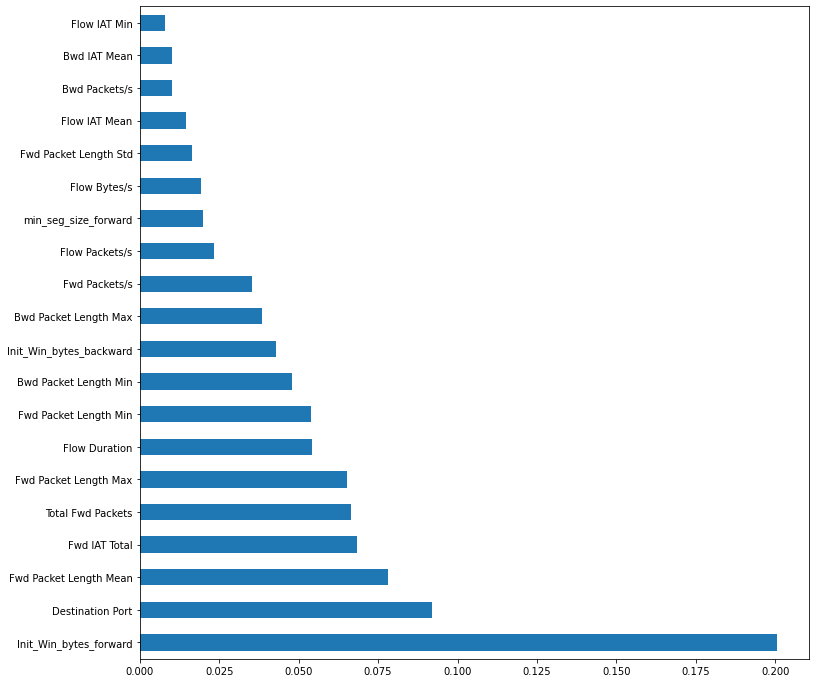

In [115]:
# Listing and visualizing the importance scores of features

feature_scores = pd.Series(rf_optimised.feature_importances_, index=X_train.columns)

print(feature_scores.nlargest(X_train.columns.size))

feature_scores.nlargest(20).plot(kind='barh', figsize=(12,12))

In [116]:
# Dropping features which have 0.0 meaning score to reduce the complexity
# fr : feature reduced, this will be added to names of relevant variables / objects

highest_features = feature_scores[(feature_scores != 0.0)].sort_values()

X_train.columns.size, X_test.columns.size

X_train_fr = X_train[X_train.columns.intersection(highest_features.index)]
X_test_fr = X_test[X_test.columns.intersection(highest_features.index)]

X_train_fr.columns.size, X_test_fr.columns.size

(41, 41)

(28, 28)

In [117]:
# Retraining after feature selection and checking final results

rf_optimised_fr = RandomForestClassifier(random_state=0, n_estimators=50, max_depth=None, criterion='entropy')
rf_optimised_fr.fit(X_train, y_train)
y_pred = rf_optimised_fr.predict(X_test)

evaluate(y_pred, y_test)

# rf_optimised_fr = DecisionTreeClassifier(criterion='entropy', 
#                                          max_depth=None, 
#                                         min_samples_split=2, 
#                                                      splitter='random')
# dtc_model_sampled_optimised.fit(X_train_sampled, y_train_sampled)
# y_pred = dtc_model_sampled_optimised.predict(X_test)

# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# print("\n\n", classification_report(y_test, y_pred))

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

[[36002     1     0     0     0]
 [    0 36189     0     0     0]
 [    0     0   848     0    10]
 [    0     0     0    14     0]
 [    1     0    21     0   376]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36003
           1       1.00      1.00      1.00     36189
           2       0.98      0.99      0.98       858
           3       1.00      1.00      1.00        14
           4       0.97      0.94      0.96       398

    accuracy                           1.00     73462
   macro avg       0.99      0.99      0.99     73462
weighted avg       1.00      1.00      1.00     73462



- As the results showed that the performance did not change, so we reduced the complexity of the model

## Additional Evaluation of Final Model

ROCAUC(ax=<AxesSubplot:>,
       estimator=RandomForestClassifier(criterion='entropy', n_estimators=50,
                                        random_state=0))

0.999728646821506

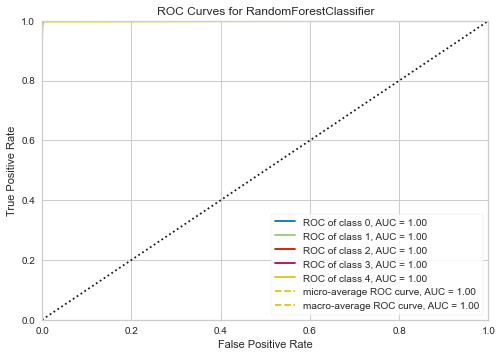

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>



Cohen's Kappa Score: 0.9991310541659739


In [118]:
# A visualization package to show ROC for multi-class

from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf_optimised_fr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

print(f"\n\nCohen's Kappa Score: {cohen_kappa_score(y_test, y_pred)}")